In [1]:
import cmocean.cm as cm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from salishsea_tools import viz_tools

In [22]:
results_fall = pd.read_csv('results_0_30_fall_noferry.csv')
results_fall['season'] = 'fall'
results_winter = pd.read_csv('results_0_30_winter_noferry.csv')
results_winter['season'] = 'winter'
results_spring = pd.read_csv('results_0_30_spring_noferry.csv')
results_spring['season'] = 'spring'
results_summer = pd.read_csv('results_0_30_summer_noferry.csv')
results_summer['season'] = 'summer'

In [23]:
# results_all = pd.read_csv('results_0_30_fall_noferry.csv')
results_all = pd.concat([results_fall, results_winter, results_spring, results_summer])
results_all = results_all.rename(columns={'Unnamed: 0': 'model'})
cols = results_all.columns.tolist()
cols.insert(0, cols.pop(cols.index('region')))
results_all = results_all.reindex(columns=cols)
results_201905R = results_all[results_all['model'] == '201905R']
results_202111 = results_all[results_all['model'] == '202111']
results_all

,region,model,number,bias,rmse,crmse,swillmott,slopedev,const,systematic,nonsystematic,spread,season
0,Nooksack,201905R,108,-0.310631,1.311044,1.273713,0.244135,0.239794,6.619411,0.484305,1.098044,0.287759,fall
1,Skagit,201905R,257,0.742912,3.693806,3.618326,0.275463,0.665464,18.928420,3.551479,0.858105,0.866492,fall
2,Snohomish,201905R,2006,-0.151169,0.678819,0.661772,0.078448,0.237808,7.012117,0.364002,0.516778,0.379088,fall
3,Nisqually,201905R,9642,-1.039494,1.075963,0.277754,0.610243,-0.353320,-11.690923,1.045458,0.312593,-0.544289,fall
4,Elwha,201905R,1710,-0.108382,0.373141,0.357053,0.063357,0.110887,3.518735,0.139635,0.328417,0.189462,fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,Nanaimo,202111,2439,0.035133,0.506425,0.505205,0.029387,-0.107948,-3.183975,0.157653,0.509387,-0.214472,summer
18,Puntledge,202111,2040,0.424407,0.804777,0.683773,0.155540,0.310307,9.167394,0.560151,0.508747,0.458066,summer
19,Salmon,202111,1533,0.081366,0.230049,0.215179,0.099455,0.292217,9.166192,0.148681,0.155430,0.454752,summer
20,Homathko,202111,3012,0.876115,3.019139,2.889225,0.047173,0.146578,4.674182,1.414045,2.493168,0.269209,summer


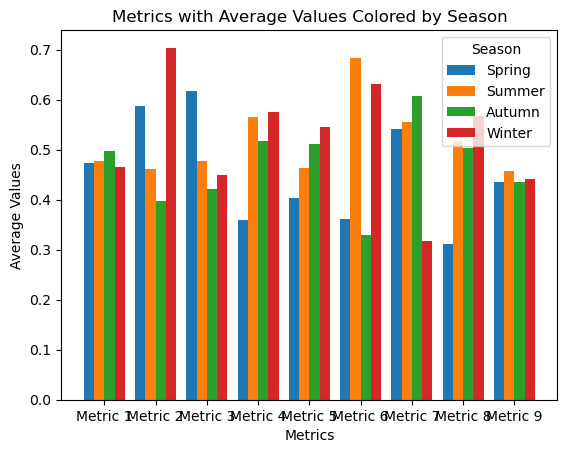

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data: 9 metrics, each with 8 data points, colored by season
metrics = ['Metric 1', 'Metric 2', 'Metric 3', 'Metric 4', 'Metric 5', 'Metric 6', 'Metric 7', 'Metric 8', 'Metric 9']
seasons = ['Spring', 'Summer', 'Autumn', 'Winter']

# Generate random data for each metric and season
data = np.random.rand(9, 8, 4)

# Create the plot
fig, ax = plt.subplots()

# Set the width of the bars
bar_width = 0.2
bar_positions = np.arange(len(metrics))

# Plot each metric with different colors for each season
for i, season in enumerate(seasons):
    ax.bar(bar_positions + i * bar_width - (bar_width * (len(seasons) - 1) / 2),
           data[:, :, i].mean(axis=1), width=bar_width, label=season)

# Set labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Average Values')
ax.set_title('Metrics with Average Values Colored by Season')

# Set x-axis ticks and labels
ax.set_xticks(bar_positions)
ax.set_xticklabels(metrics)

# Add a legend
ax.legend(title='Season')

# Show the plot
plt.show()

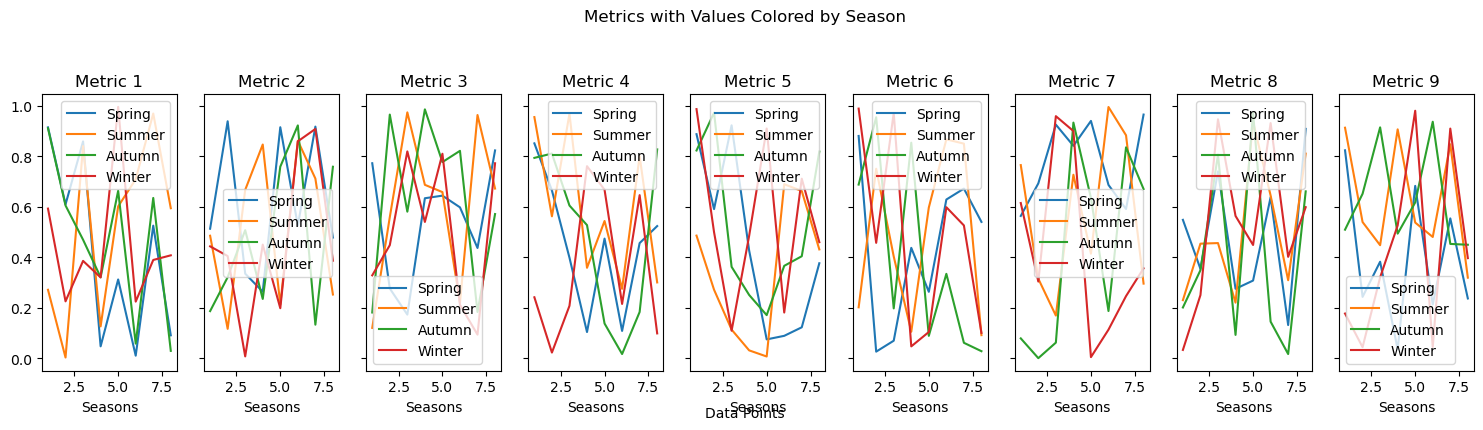

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data: 9 metrics, each with 8 data points, colored by season
metrics = ['Metric 1', 'Metric 2', 'Metric 3', 'Metric 4', 'Metric 5', 'Metric 6', 'Metric 7', 'Metric 8', 'Metric 9']
seasons = ['Spring', 'Summer', 'Autumn', 'Winter']

# Generate random data for each metric and season
data = np.random.rand(9, 8, 4)

# Set up subplots
fig, axes = plt.subplots(1, len(metrics), figsize=(15, 4), sharey=True)

# Plot each metric in its own subplot
for i, metric in enumerate(metrics):
    ax = axes[i]
    ax.set_title(metric)
    ax.set_xlabel('Seasons')
    
    # Plot data for each season
    for j, season in enumerate(seasons):
        ax.plot(range(1, 9), data[i, :, j], label=season)

    ax.legend()

# Set common y-axis label and title for the entire figure
fig.suptitle('Metrics with Values Colored by Season', y=1.05)
fig.text(0.5, 0.04, 'Data Points', ha='center', va='center')

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plot
plt.show()

In [3]:
results_best = results_202111.drop(columns=['model','number'])
results_best

,region,bias,rmse,crmse,swillmott,slopedev,const,systematic,nonsystematic,spread
11,Nooksack,0.066712,1.238026,1.236227,0.207014,0.180331,5.278283,0.287279,1.110082,0.227408
12,Skagit,-0.594394,4.042396,3.998457,0.185127,0.108168,2.361574,0.819738,3.761456,0.145425
13,Snohomish,-0.090949,0.537296,0.529543,0.032013,-0.190670,-5.834359,0.280639,0.508400,-0.408395
14,Nisqually,-0.661800,0.678296,0.148680,0.429411,-0.221311,-7.333575,0.665476,0.148323,-0.448801
15,Elwha,-0.141437,0.331413,0.299716,0.044538,0.004648,0.010598,0.141485,0.298999,0.008614
16,Cowichan,-0.624727,0.893532,0.638840,0.232992,-0.613426,-19.121226,0.766822,0.683273,-1.207843
17,Nanaimo,0.063282,0.285094,0.277982,0.030149,-0.032092,-0.914897,0.068527,0.281284,-0.061492
18,Puntledge,0.155711,0.332508,0.293795,0.071610,0.066831,2.097646,0.161689,0.281322,0.116330
19,Salmon,0.128486,0.182422,0.129495,0.248915,0.169692,5.481015,0.131960,0.116604,0.231024
20,Homathko,0.318735,1.865697,1.838269,0.050680,0.100285,3.125791,0.547518,1.700759,0.153972


In [4]:
def compare_stats(res_201905R, res_202111, metric):
    if np.abs(res_201905R[metric].values[0]) < np.abs(res_202111[metric].values[0]):
        return '201905R'
    elif np.abs(res_201905R[metric].values[0]) > np.abs(res_202111[metric].values[0]):
        return '202111'
    else:
        return 'same'

In [5]:
def compile_compare(res_201905R, res_202111, metric, regions):
    met_vec = []
    for region in regions:
        met_vec = met_vec + [compare_stats(res_201905R[res_201905R['region'] == region], res_202111[res_202111['region'] == region], metric)]
    return met_vec

In [6]:
regions = results_202111.region.to_list()
for metric in results_best.columns[1:]:
    results_best[metric] = compile_compare(results_201905R, results_202111, metric, regions)
results_best

,region,bias,rmse,crmse,swillmott,slopedev,const,systematic,nonsystematic,spread
11,Nooksack,202111,202111,202111,202111,202111,202111,202111,201905R,202111
12,Skagit,202111,201905R,201905R,202111,202111,202111,202111,201905R,202111
13,Snohomish,202111,202111,202111,202111,202111,202111,202111,202111,201905R
14,Nisqually,202111,202111,202111,202111,202111,202111,202111,202111,202111
15,Elwha,201905R,202111,202111,202111,202111,202111,201905R,202111,202111
16,Cowichan,202111,202111,201905R,202111,201905R,201905R,201905R,201905R,201905R
17,Nanaimo,202111,202111,202111,202111,202111,202111,202111,202111,202111
18,Puntledge,201905R,202111,202111,202111,202111,202111,202111,202111,202111
19,Salmon,202111,202111,201905R,202111,202111,202111,202111,201905R,202111
20,Homathko,201905R,202111,202111,202111,202111,202111,202111,202111,202111


Text(0.5, 1.0, 'Number of Obs Per Region')

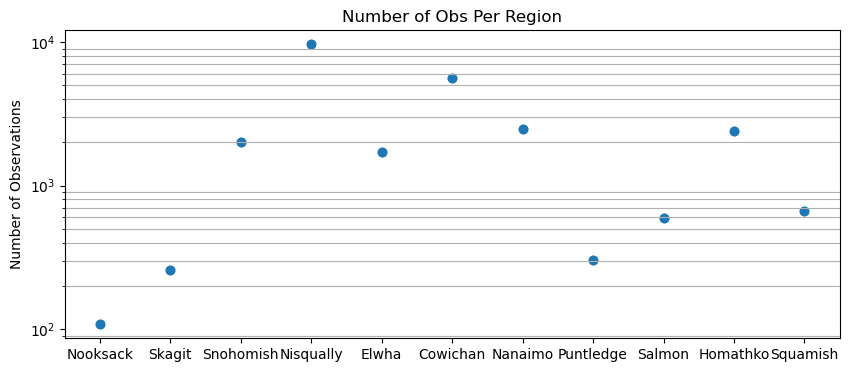

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

ax.grid(axis='y', which='minor')
ax.scatter(results_all['region'], results_all['number'])
ax.set_yscale('log')

ax.set_ylabel(r'Number of Observations')
ax.set_title('Number of Obs Per Region')

bias improved in 202111 for: Nooksack, Skagit, Snohomish, Nisqually, Cowichan, Nanaimo, Salmon, Squamish


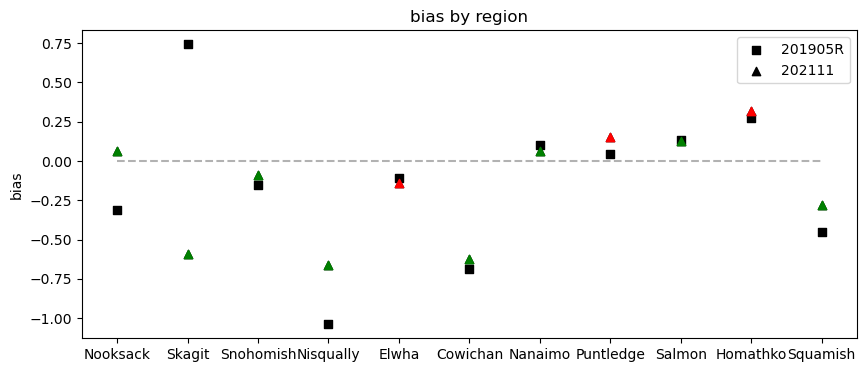

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

metric = 'bias'

ax.scatter(results_201905R['region'], results_201905R[metric],c='k', marker='s',label='201905R')
ax.scatter(results_202111['region'], results_202111[metric],c='k',marker='^',label='202111')

ax.scatter(results_202111[results_best[metric] == '202111']['region'], results_202111[results_best[metric] == '202111'][metric],c='g', marker='^')
ax.scatter(results_202111[results_best[metric] != '202111']['region'], results_202111[results_best[metric] != '202111'][metric],c='r', marker='^')
ax.plot(results_201905R['region'], [0]*len(results_201905R['region']),'k--', alpha=0.3)

ax.set_ylabel(metric)
ax.set_title(metric + ' by region')
ax.legend()

plt.savefig('stats_bias_by_region.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

rmse improved in 202111 for: Nooksack, Snohomish, Nisqually, Elwha, Cowichan, Nanaimo, Puntledge, Salmon, Homathko, Squamish


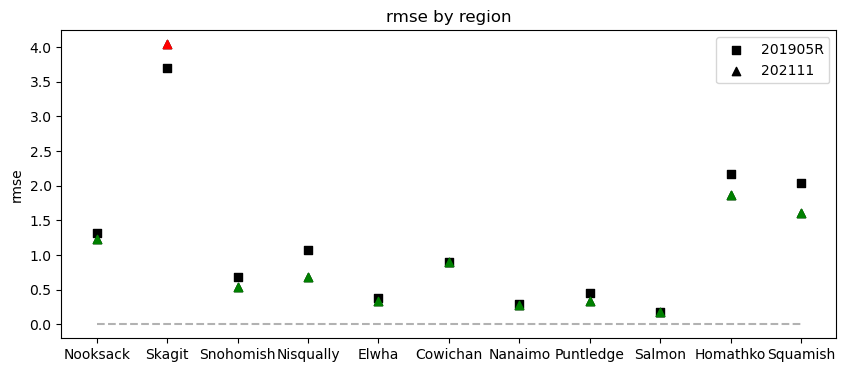

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

metric = 'rmse'

ax.scatter(results_201905R['region'], results_201905R[metric],c='k', marker='s',label='201905R')
ax.scatter(results_202111['region'], results_202111[metric],c='k',marker='^',label='202111')

ax.scatter(results_202111[results_best[metric] == '202111']['region'], results_202111[results_best[metric] == '202111'][metric],c='g', marker='^')
ax.scatter(results_202111[results_best[metric] != '202111']['region'], results_202111[results_best[metric] != '202111'][metric],c='r', marker='^')
ax.plot(results_201905R['region'], [0]*len(results_201905R['region']),'k--', alpha=0.3)

ax.set_ylabel(metric)
ax.set_title(metric + ' by region')
ax.legend()

plt.savefig('stats_rmse_by_region.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

crmse improved in 202111 for: Nooksack, Snohomish, Nisqually, Elwha, Nanaimo, Puntledge, Homathko, Squamish


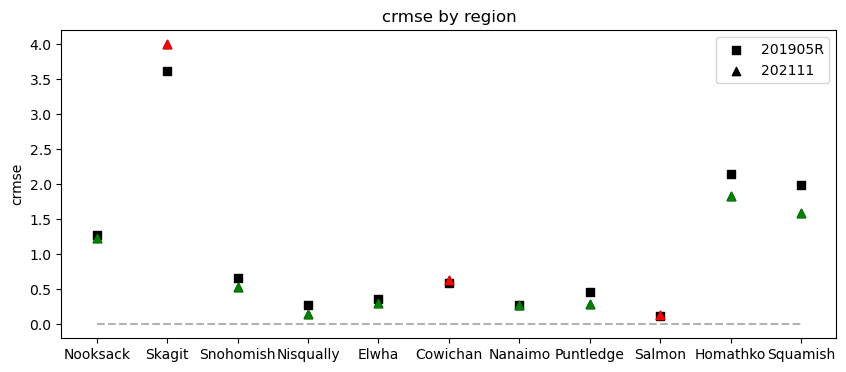

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

metric = 'crmse'

ax.scatter(results_201905R['region'], results_201905R[metric],c='k', marker='s',label='201905R')
ax.scatter(results_202111['region'], results_202111[metric],c='k',marker='^',label='202111')

ax.scatter(results_202111[results_best[metric] == '202111']['region'], results_202111[results_best[metric] == '202111'][metric],c='g', marker='^')
ax.scatter(results_202111[results_best[metric] != '202111']['region'], results_202111[results_best[metric] != '202111'][metric],c='r', marker='^')
ax.plot(results_201905R['region'], [0]*len(results_201905R['region']),'k--', alpha=0.3)

ax.set_ylabel(metric)
ax.set_title(metric + ' by region')
ax.legend()

plt.savefig('stats_crmse_by_region.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

swillmott improved in 202111 for: Nooksack, Skagit, Snohomish, Nisqually, Elwha, Cowichan, Nanaimo, Puntledge, Salmon, Homathko, Squamish


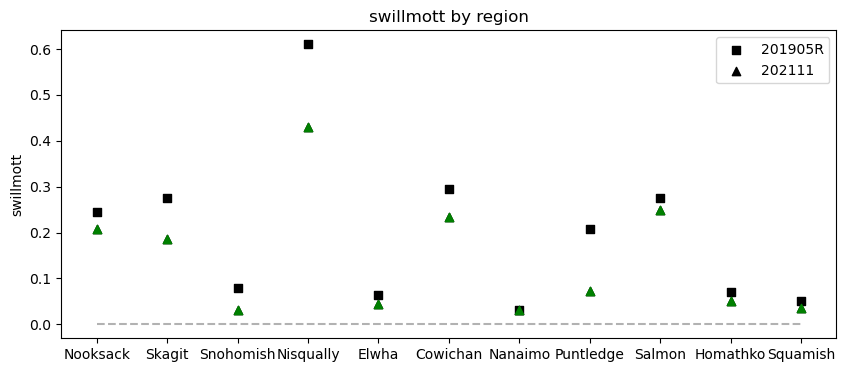

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

metric = 'swillmott'

ax.scatter(results_201905R['region'], results_201905R[metric],c='k', marker='s',label='201905R')
ax.scatter(results_202111['region'], results_202111[metric],c='k',marker='^',label='202111')

ax.scatter(results_202111[results_best[metric] == '202111']['region'], results_202111[results_best[metric] == '202111'][metric],c='g', marker='^')
ax.scatter(results_202111[results_best[metric] != '202111']['region'], results_202111[results_best[metric] != '202111'][metric],c='r', marker='^')
ax.plot(results_201905R['region'], [0]*len(results_201905R['region']),'k--', alpha=0.3)

ax.set_ylabel(metric)
ax.set_title(metric + ' by region')
ax.legend()

plt.savefig('stats_swillmott_by_region.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

slopedev improved in 202111 for: Nooksack, Skagit, Snohomish, Nisqually, Elwha, Nanaimo, Puntledge, Salmon, Homathko, Squamish


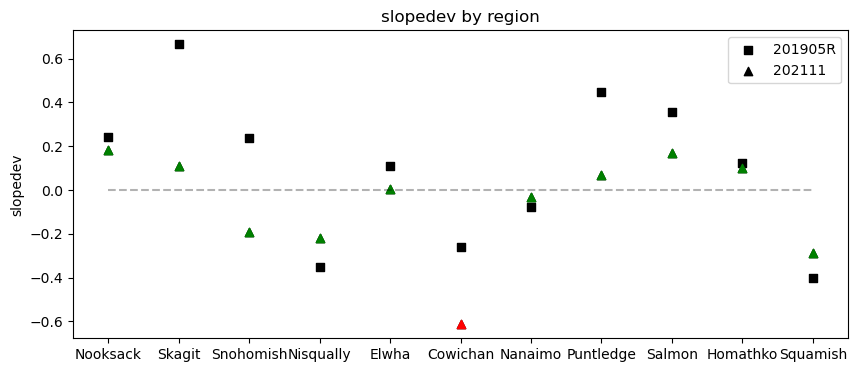

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

metric = 'slopedev'

ax.scatter(results_201905R['region'], results_201905R[metric],c='k', marker='s',label='201905R')
ax.scatter(results_202111['region'], results_202111[metric],c='k',marker='^',label='202111')

ax.scatter(results_202111[results_best[metric] == '202111']['region'], results_202111[results_best[metric] == '202111'][metric],c='g', marker='^')
ax.scatter(results_202111[results_best[metric] != '202111']['region'], results_202111[results_best[metric] != '202111'][metric],c='r', marker='^')
ax.plot(results_201905R['region'], [0]*len(results_201905R['region']),'k--', alpha=0.3)

ax.set_ylabel(metric)
ax.set_title(metric + ' by region')
ax.legend()

plt.savefig('stats_slopedev_by_region.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

const improved in 202111 for: Nooksack, Skagit, Snohomish, Nisqually, Elwha, Nanaimo, Puntledge, Salmon, Homathko, Squamish


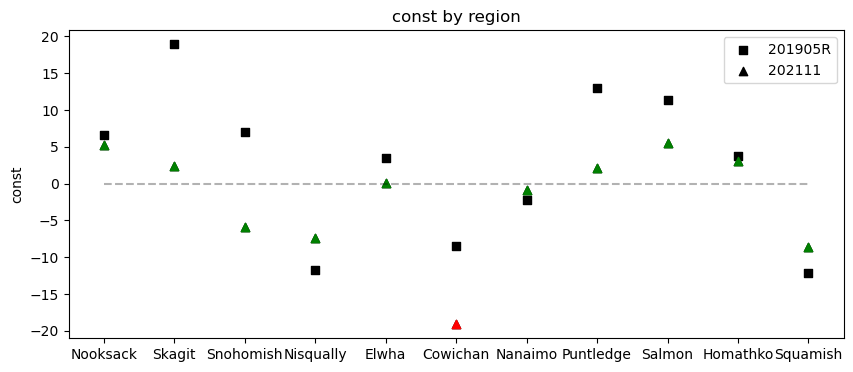

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

metric = 'const'

ax.scatter(results_201905R['region'], results_201905R[metric],c='k', marker='s',label='201905R')
ax.scatter(results_202111['region'], results_202111[metric],c='k',marker='^',label='202111')

ax.scatter(results_202111[results_best[metric] == '202111']['region'], results_202111[results_best[metric] == '202111'][metric],c='g', marker='^')
ax.scatter(results_202111[results_best[metric] != '202111']['region'], results_202111[results_best[metric] != '202111'][metric],c='r', marker='^')
ax.plot(results_201905R['region'], [0]*len(results_201905R['region']),'k--', alpha=0.3)

ax.set_ylabel(metric)
ax.set_title(metric + ' by region')
ax.legend()

plt.savefig('stats_const_by_region.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

systematic improved in 202111 for: Nooksack, Skagit, Snohomish, Nisqually, Nanaimo, Puntledge, Salmon, Homathko, Squamish


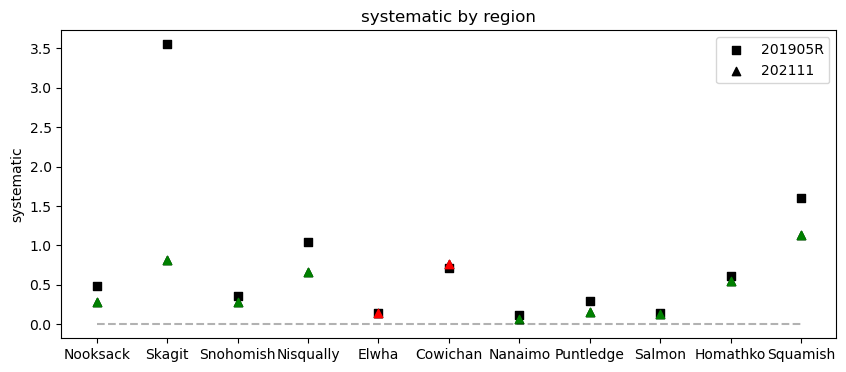

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

metric = 'systematic'

ax.scatter(results_201905R['region'], results_201905R[metric],c='k', marker='s',label='201905R')
ax.scatter(results_202111['region'], results_202111[metric],c='k',marker='^',label='202111')

ax.scatter(results_202111[results_best[metric] == '202111']['region'], results_202111[results_best[metric] == '202111'][metric],c='g', marker='^')
ax.scatter(results_202111[results_best[metric] != '202111']['region'], results_202111[results_best[metric] != '202111'][metric],c='r', marker='^')
ax.plot(results_201905R['region'], [0]*len(results_201905R['region']),'k--', alpha=0.3)

ax.set_ylabel(metric)
ax.set_title(metric + ' by region')
ax.legend()

plt.savefig('stats_systematic_by_region.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

nonsystematic improved in 202111 for: Snohomish, Nisqually, Elwha, Nanaimo, Puntledge, Homathko, Squamish


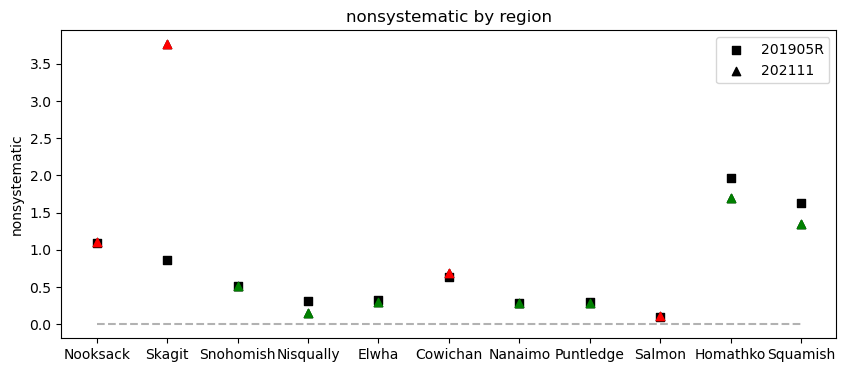

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

metric = 'nonsystematic'

ax.scatter(results_201905R['region'], results_201905R[metric],c='k', marker='s',label='201905R')
ax.scatter(results_202111['region'], results_202111[metric],c='k',marker='^',label='202111')

ax.scatter(results_202111[results_best[metric] == '202111']['region'], results_202111[results_best[metric] == '202111'][metric],c='g', marker='^')
ax.scatter(results_202111[results_best[metric] != '202111']['region'], results_202111[results_best[metric] != '202111'][metric],c='r', marker='^')
ax.plot(results_201905R['region'], [0]*len(results_201905R['region']),'k--', alpha=0.3)

ax.set_ylabel(metric)
ax.set_title(metric + ' by region')
ax.legend()

plt.savefig('stats_nonsystematic_by_region.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

spread improved in 202111 for: Nooksack, Skagit, Nisqually, Elwha, Nanaimo, Puntledge, Salmon, Homathko, Squamish


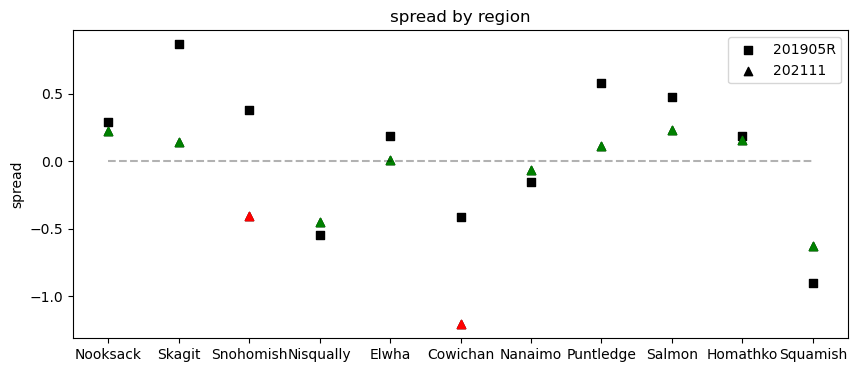

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

metric = 'spread'

ax.scatter(results_201905R['region'], results_201905R[metric],c='k', marker='s',label='201905R')
ax.scatter(results_202111['region'], results_202111[metric],c='k',marker='^',label='202111')

ax.scatter(results_202111[results_best[metric] == '202111']['region'], results_202111[results_best[metric] == '202111'][metric],c='g', marker='^')
ax.scatter(results_202111[results_best[metric] != '202111']['region'], results_202111[results_best[metric] != '202111'][metric],c='r', marker='^')
ax.plot(results_201905R['region'], [0]*len(results_201905R['region']),'k--', alpha=0.3)

ax.set_ylabel(metric)
ax.set_title(metric + ' by region')
ax.legend()

# ax.set_ylim([-1.5, 1.5])  # cropping the nanaimo data which includes all of the ferry data


plt.savefig('stats_spread_by_region.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)